<a href="https://colab.research.google.com/github/HWMV/Machine_Learning/blob/main/Machine_Learning9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝을 통한 이미지 처리
1. 딥러닝
  * 뇌의 뉴런과 유사한 머신러닝 알고리즘 (인공신경망 구축)
  * 심층 신경망 (DNN, Deep Neural Network)
  * 입력층 - 은닉층 - 출력층

  **언더피팅과 오버피팅**
  * 딥러닝은 오버피팅이 많이 된다
  * Validation 함수에서 loss가 올라가는 지점 부터 오버피팅(과대적합) : 이 지점을 찾아 멈춰줘야 한다

  **에폭(Epoch)**


  [딥러닝의 학습 과정]
* 순전파 : 예측갑 계산
* 손실함수 : 오차 측정
* 옵티마이저(최적화) : 경사하강법
* 역전파 : 가중치 조절

**TensorFlow 활용**
* 딥러닝을 좀 더 쉽게 적용하기 위한 Lib
* 구글팀에서 공개
* 고수준 API 지원 (keras)
* 자동 미분

2. 이미지 분류
**Mnist** (손으로 쓴 숫자들로 이루어진 대형 DB)
* 흑백
* 28x28 픽셀

**Fashion-Mnist** (의류 이미지 분류)
* 10개 클래스
* 그레이
* 28x28 픽셀

In [29]:
# 이미지 분류
# 라이브러리 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Sequential 모델 (레이어 쌓는 모델)
model = Sequential([
    # input 데이터(28,28)을 1행으로 풀어줌(784)
    Flatten(input_shape=(28,28)),

    # 완전 연결 hidden layer : 128개듸 뉴런
    # 활성화함수(activation) : relu 는 0보다 작을 땐 0, 클때부터 x 값 출력하는 활성화함수
    Dense(units=128, activation='relu'),

    # 라스트 출력 layer : 10개
    # 활성화함수(activation) : softmax 는 확습된 데이터의 확률 중 가장 높은 것 선택하는 활성화함수
    Dense(units=10, activation='softmax') # 라스트 출력 layer : 10개
])

In [30]:
# 모델 컴파일(compile 함수활용) : 어떤 식으로 엮어서 학습 시킬 건지 설정
# adam : 최적화 기법(알고리즘), momentum +
# momentum : 최적화 기법 중 경사하강법에 관성을 부여하는 기법, 이전 기울기를 기억해 Local Minium(기울기 0 변곡점)에서 추가로 이동할 수 있게 해준다
# RMSProp : 최적화 기법, 기울기를 지수이동평균(EMA)를 활용하여, time별 기울기를 효율적 적용한다
# 지수이동평균(EMA) : 가증 승수를 이용하여 계산 (최근 데이터에 가중치를 높게 부여)

# 1. optimizer adam
model.compile(optimizer='adam',

              # 2. loss 함수는 다중 분류여서 sparse_categorical_crossentoropy 활용
              loss='sparse_categorical_crossentoropy',

              # 3. 행렬구조는 accuracy
              metrics=['accuracy'])


In [31]:
# epoch (compile 후 학습 진행)

# 전체 데이터를 5번 epoch(학습)
# model.fit(x_train, y_train, epoch=5)

### **이미지 분류 실습**

**mnist data**

In [32]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt

In [33]:
# version
tf.__version__

'2.13.0'

In [34]:
# 데이터 셋 호출
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
# 데이터 크기
(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [36]:
# 데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

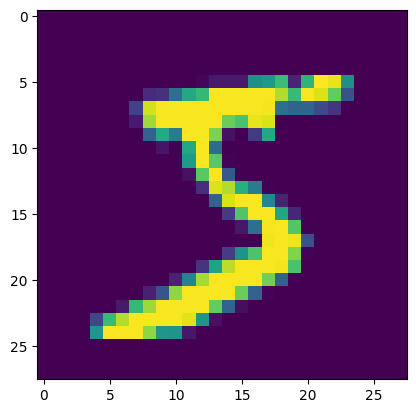

In [37]:
# 데이터 확인 (이미지)
plt.imshow(x_train[0])


In [38]:
# label 확인
y_train[0]  # 매칭 Ok

5

In [39]:
from keras.src.activations import activation_layers
# 모델 만들기
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    # 2차원 데이터를 1차원으로 변경
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),

    # 10개 중에서 총 합이 1 안에서 확률값으로 출력
    Dense(10, activation='softmax')
])

In [40]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# 모델 컴파일(optimizer, loss, metrics 설정)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# epochs (5번), batch_size = 디폴트 32
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6316 - accuracy: 0.8884
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3353 - accuracy: 0.9291
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2542 - accuracy: 0.9400
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2429 - accuracy: 0.9435
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2246 - accuracy: 0.9480


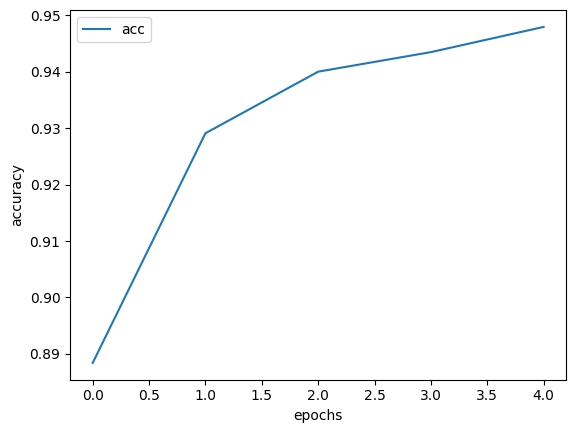

In [43]:
# 학습 정확도 (epoch에 따른 accuracy 변화를 시각화)
plt.plot(history.history['accuracy'],label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

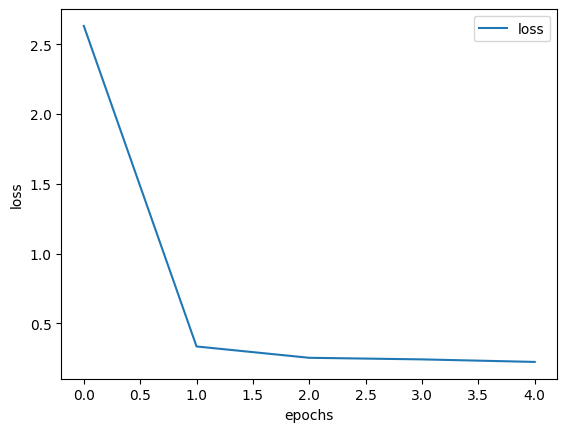

In [45]:
# 학습 정확도 (epoch에 따른 loss 변화를 시각화)
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

**Fashino_mnist 실습**

In [1]:
# 라이브러리 호출
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 데이터 호출
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 데이터 크기 확인
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [4]:
# 정규화 (0~1사이) : 데이터가 255개 있는것 어떻게 확인?
# 픽셀의 값은 0~255 사이의 정수, 이미지의 픽셀 값을 정규화하는 일반적인 방법
x_train, x_test = x_train/255.0, x_test/255.0

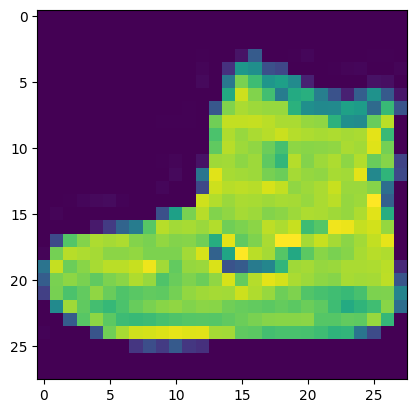

In [5]:
# 데이터 확인(이미지)
plt.imshow(x_train[0])

In [6]:
y_train[0]

9

In [7]:
# label 확인
classes =[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
print(classes[y_train[0]])

Ankle boot


T-shirt/top


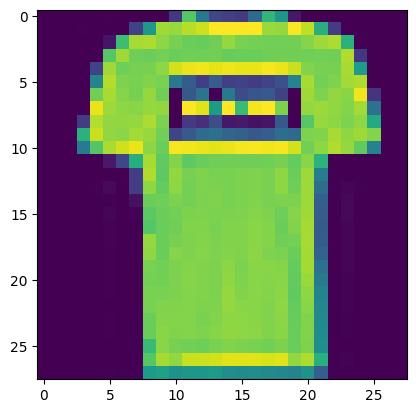

In [9]:
# data 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(x_train[1])

In [11]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Dropout layer 추가 : % 를 정해서 연결하는 비중을 선택할 수 있다 (과적합 방지)
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 학습
# history = model.fit(x_train, y_train, validation_split=0.2,~): 20% 나눠서 검증데이터 해달라!
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5328 - accuracy: 0.8110 - val_loss: 0.4471 - val_accuracy: 0.8344
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3991 - accuracy: 0.8564 - val_loss: 0.3863 - val_accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3664 - accuracy: 0.8669 - val_loss: 0.3690 - val_accuracy: 0.8649
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3438 - accuracy: 0.8736 - val_loss: 0.3737 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3306 - accuracy: 0.8782 - val_loss: 0.3729 - val_accuracy: 0.8644
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3176 - accuracy: 0.8816 - val_loss: 0.3695 - val_accuracy: 0.8628
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3054 - accuracy: 0.8866 - val_loss: 0.3446 - val_acc

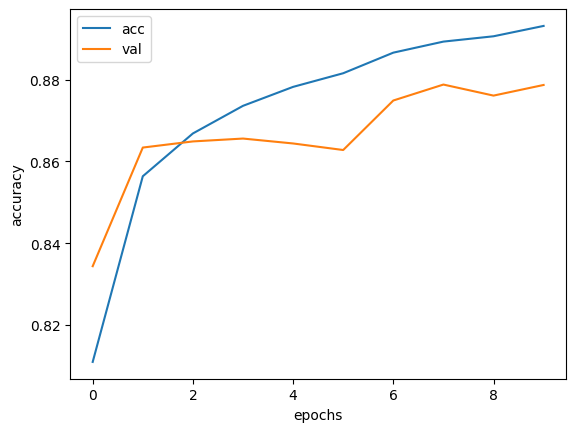

In [14]:
# 학습 정확도
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

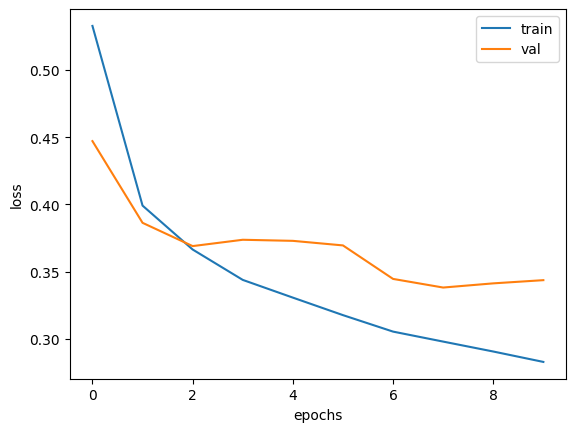

In [19]:
# 학습 정확도
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [23]:
# 예측
pred = model.predict(x_test)
pred[1]

313/313 [==============================] - 1s 2ms/step


array([3.9985109e-04, 4.1665801e-14, 9.9780297e-01, 3.1802902e-08,
       5.3289690e-04, 2.8895332e-13, 1.2642688e-03, 3.9381010e-15,
       1.6162045e-09, 3.8888331e-17], dtype=float32)

In [21]:
# 가장 높은 값 찾기 (np.argmax()는 데이터 중 가장 높은 인덱스 값 반환)
# 예측데이터 인덱스 1의 데이터 중 가장 높은 확률을 가진 값 반환(매칭), class 중 1개
np.argmax(pred[1])

2

In [22]:
# 예측한 label
classes[np.argmax(pred[1])]

'Pullover'

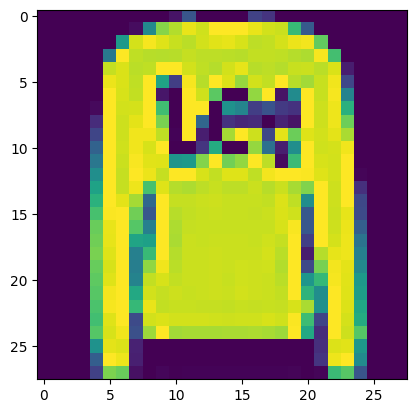

In [24]:
# 이미지 확인
plt.imshow(x_test[1])

## 3. **CNN을 활용한 이미지 분류**

* 모델의 성능을 향상시키기 위함
* CNN
  * 시각적 영상을 분석하는 데 사용되는 다층의 피드-포워드적인 인공신경망의 한종류
  * 합성곱층(convolution layer)과 풀링층(pooling layer)으로 구성
  * Flatten, Dense layer 전 단계 레이어 추가



**CNN 실습**

In [39]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터 호출
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# shape 변경 : reshape을 통해 1을 추가함. 왜? 이미지를 입력 받아야해서 깊이(채널수) 입력을 위해 그레이스 케이스 '1'을 추가
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

# 모델
model = Sequential([

    # 해당 레이어에서 사용될 32개에 커널이 3 by 3 커널수로 필터한다 (합성곱을 통해서)
    # 3x3 커널을 디폴트로 사용하면, shape -2
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),

    # Conv2D로 필터한 커널에서 최대 풀링 레이어를 정의한다. (2,2)는 풀링 윈도우의 크기, 출력의 가로/세로는 절반으로 줄어든다
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [38]:
# 학습
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4565 - accuracy: 0.8353 - val_loss: 0.3556 - val_accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3078 - accuracy: 0.8878 - val_loss: 0.3177 - val_accuracy: 0.8852
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2632 - accuracy: 0.9031 - val_loss: 0.3066 - val_accuracy: 0.8897
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2345 - accuracy: 0.9127 - val_loss: 0.2806 - val_accuracy: 0.8957
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2103 - accuracy: 0.9210 - val_loss: 0.2559 - val_accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1874 - accuracy: 0.9306 - val_loss: 0.2513 - val_accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1690 - accuracy: 0.9365 - val_loss: 0.2480 -

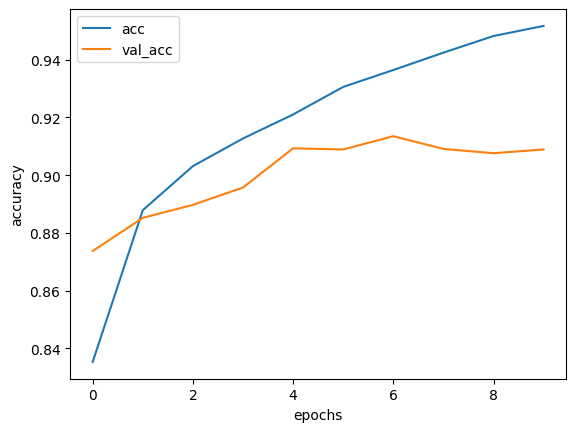

In [42]:
# 학습 정확도

plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

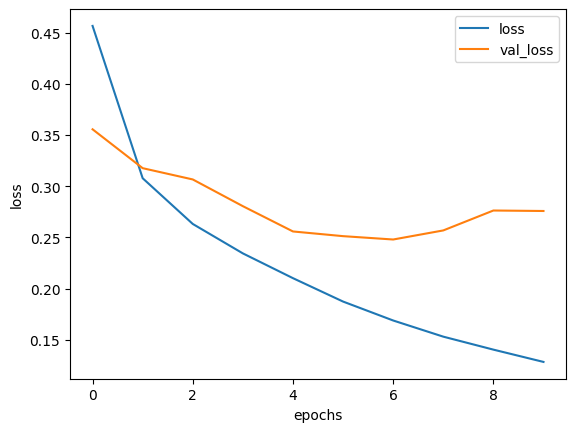

In [43]:
# loss

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()